<a href="https://colab.research.google.com/github/kylemath/visual-illusions/blob/master/notebooks/Vis_Illusion_GAN_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mo Illusions dataset:
https://drive.google.com/drive/u/0/folders/1R2626myKPLIcHksYDuKRTbROE77VGaj5

Scrape pics from google images


In [0]:
#!git clone https://github.com/montoyamoraga/scrapers.git

In [0]:
#!python3 script.py "illusion" 5000


Scrape pics from Reddit

In [0]:
#ripme scrapper

Pre-process images for gan

In [0]:
#!git clone https://github.com/genekogan/ml4a-guides

In [0]:
#python3 dataset_utils.py --input_src /Users/kylemathewson/scrapers/scraper-google-images/images_illusion/_jpg --shuffle --output_dir /Users/kylemathewson/scrapers/scraper-google-images/images_illusion/ --w 128 --h 128 --centered --action none --save_ext jpg --save_mode output_only


Install DCGAN repo

In [1]:
!git clone https://github.com/carpedm20/DCGAN-tensorflow
%cd DCGAN-tensorflow


fatal: destination path 'DCGAN-tensorflow' already exists and is not an empty directory.
/content/DCGAN-tensorflow


mount your google drive to load and save pics

In [2]:
#mount google drive to load own images, follow link and get code and paste in below
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/pics/" #save images here

Mounted at /content/gdrive


to save images

In [3]:
%mkdir samples



mkdir: cannot create directory ‘samples’: File exists


Functions to display images

In [0]:
from IPython.display import clear_output, Image, display, HTML
from io import BytesIO
import scipy.misc
import numpy as np
import PIL.Image


def load_image(path, h, w):
    img0 = scipy.misc.imread(path, mode='RGB')
    img0 = scipy.misc.imresize(img0, (h, w)).astype('float64')
    return img0
  
def display_image(a, fmt='jpeg'):
    a = np.uint8(np.clip(a/255., 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))


Run a few training epochs and view results each time


Traceback (most recent call last):
  File "main.py", line 2, in <module>
    import scipy.misc
  File "/usr/local/lib/python2.7/dist-packages/scipy/misc/__init__.py", line 68, in <module>
    from scipy.interpolate._pade import pade as _pade
  File "/usr/local/lib/python2.7/dist-packages/scipy/interpolate/__init__.py", line 175, in <module>
    from .interpolate import *
  File "/usr/local/lib/python2.7/dist-packages/scipy/interpolate/interpolate.py", line 20, in <module>
    import scipy.linalg
  File "/usr/local/lib/python2.7/dist-packages/scipy/linalg/__init__.py", line 190, in <module>
    from .misc import *
  File "/usr/local/lib/python2.7/dist-packages/scipy/linalg/misc.py", line 6, in <module>
    from .lapack import get_lapack_funcs
  File "/usr/local/lib/python2.7/dist-packages/scipy/linalg/lapack.py", line 484, in <module>
    from scipy._lib._util import DeprecatedImport as _DeprecatedImport
  File "/usr/local/lib/python2.7/dist-packages/scipy/_lib/_util.py", line 9, in <mo

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


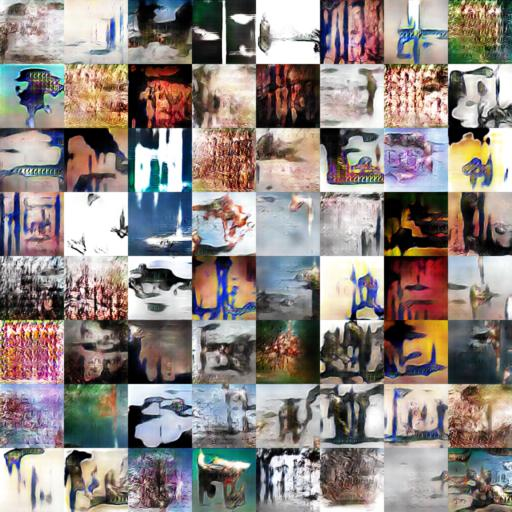

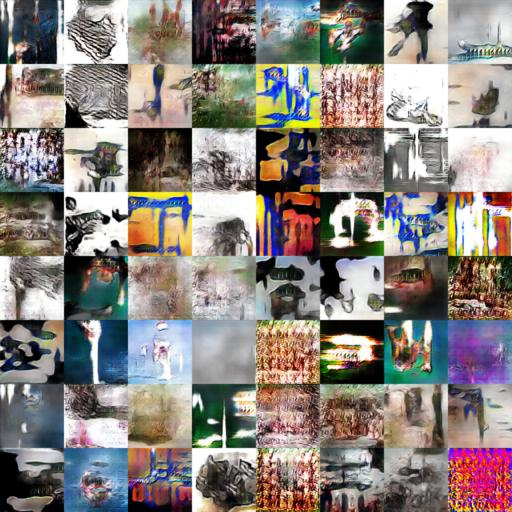

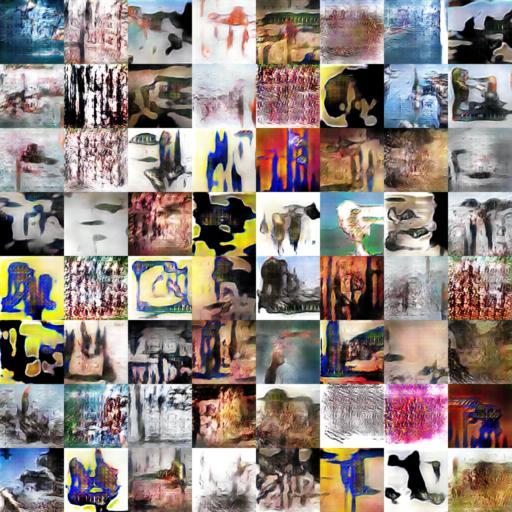

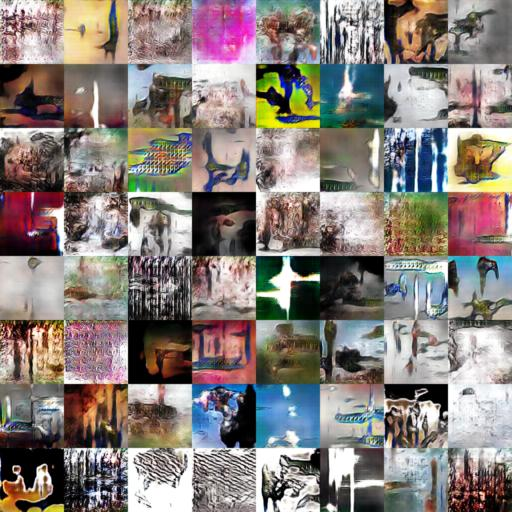

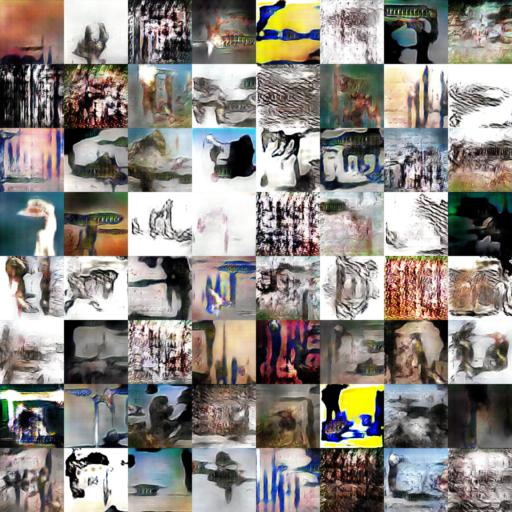

KeyboardInterrupt: ignored

In [12]:
#output size for viewing
h = 512 #make bigger to see in display
w = 512

for i_epoch in range(50):
  !python main.py --dataset illusions --data_dir /content/gdrive/My\ Drive/pics --input_height 128 --output_height 128 --checkpoint_dir /content/gdrive/My\ Drive/pics --sample_dir /content/gdrive/My\ Drive/pics --epoch 10 --train
  for i in range(5):
    img0 = load_image("samples/test_arange_" + str(i) + ".png",h, w)
    display_image(img0)


Train the model (saves checkpoints)

In [13]:
!python main.py --dataset illusions --data_dir /content/gdrive/My\ Drive/pics --input_height 128 --output_height 128 --checkpoint_dir /content/gdrive/My\ Drive/pics/gan_models --sample_dir /content/gdrive/My\ Drive/pics --epoch 500 --train

{'batch_size': <absl.flags._flag.Flag object at 0x7fec78a9d090>,
 'beta1': <absl.flags._flag.Flag object at 0x7fec78e6af50>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7fec78a9d410>,
 'crop': <absl.flags._flag.BooleanFlag object at 0x7fec78a9d590>,
 'data_dir': <absl.flags._flag.Flag object at 0x7fec78a9d490>,
 'dataset': <absl.flags._flag.Flag object at 0x7fec78a9d310>,
 'epoch': <absl.flags._flag.Flag object at 0x7fec851c7a50>,
 'generate_test_images': <absl.flags._flag.Flag object at 0x7fec78a9d690>,
 'h': <tensorflow.python.platform.app._HelpFlag object at 0x7fec78a9d6d0>,
 'help': <tensorflow.python.platform.app._HelpFlag object at 0x7fec78a9d6d0>,
 'helpfull': <tensorflow.python.platform.app._HelpfullFlag object at 0x7fec78a9d710>,
 'helpshort': <tensorflow.python.platform.app._HelpshortFlag object at 0x7fec78a9d750>,
 'input_fname_pattern': <absl.flags._flag.Flag object at 0x7fec78a9d390>,
 'input_height': <absl.flags._flag.Flag object at 0x7fec78a9d110>,
 'input_widt

to only generate:

In [14]:
!python main.py --dataset illusions --data_dir /content/gdrive/My\ Drive/pics --input_height 128 --output_height 128 --checkpoint_dir /content/gdrive/My\ Drive/pics/gan_models --sample_dir /content/gdrive/My\ Drive/pics --epoch 500

{'batch_size': <absl.flags._flag.Flag object at 0x7f7a3da27090>,
 'beta1': <absl.flags._flag.Flag object at 0x7f7a3ddf4f50>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7f7a3da27410>,
 'crop': <absl.flags._flag.BooleanFlag object at 0x7f7a3da27590>,
 'data_dir': <absl.flags._flag.Flag object at 0x7f7a3da27490>,
 'dataset': <absl.flags._flag.Flag object at 0x7f7a3da27310>,
 'epoch': <absl.flags._flag.Flag object at 0x7f7a4a151a50>,
 'generate_test_images': <absl.flags._flag.Flag object at 0x7f7a3da27690>,
 'h': <tensorflow.python.platform.app._HelpFlag object at 0x7f7a3da276d0>,
 'help': <tensorflow.python.platform.app._HelpFlag object at 0x7f7a3da276d0>,
 'helpfull': <tensorflow.python.platform.app._HelpfullFlag object at 0x7f7a3da27710>,
 'helpshort': <tensorflow.python.platform.app._HelpshortFlag object at 0x7f7a3da27750>,
 'input_fname_pattern': <absl.flags._flag.Flag object at 0x7f7a3da27390>,
 'input_height': <absl.flags._flag.Flag object at 0x7f7a3da27110>,
 'input_widt

In [0]:
!ls /content/gdrive/My\ Drive/pics/illusions




Move to the google drive

In [0]:
!mkdir /content/gdrive/My\ Drive/pics/illusion_out/
!mv samples/*.* /content/gdrive/My\ Drive/pics/illusion_out/

Display a few results

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


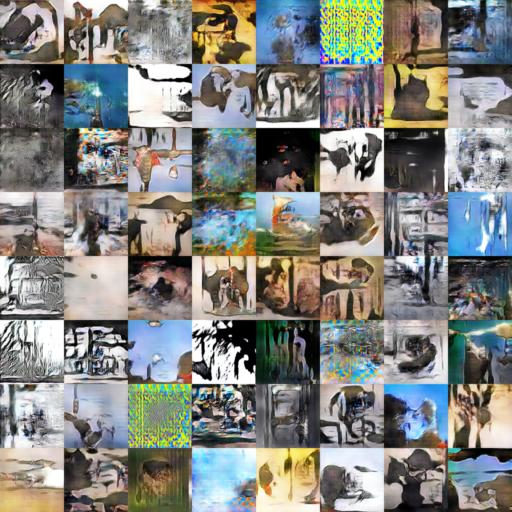

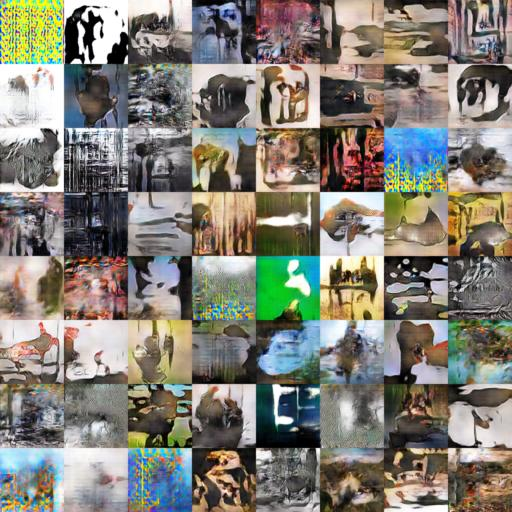

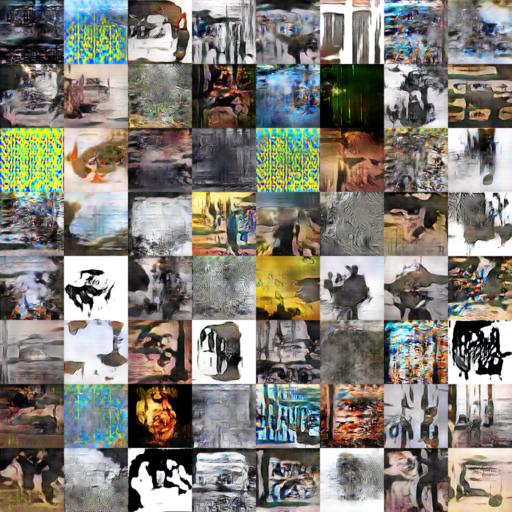

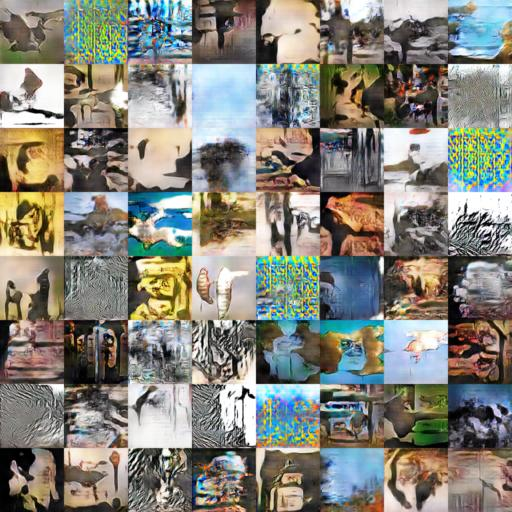

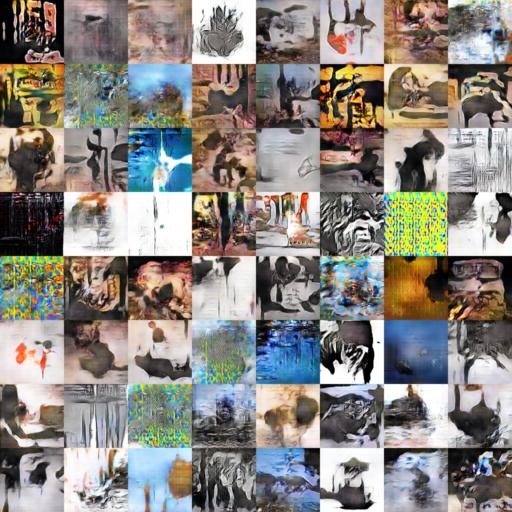

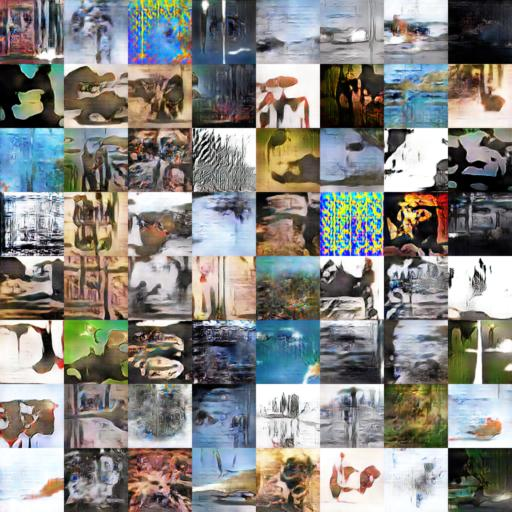

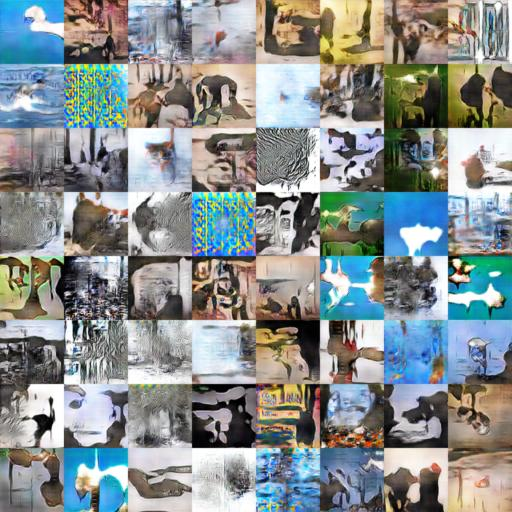

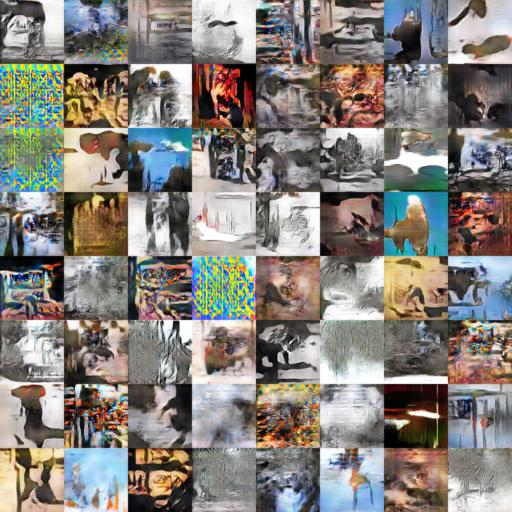

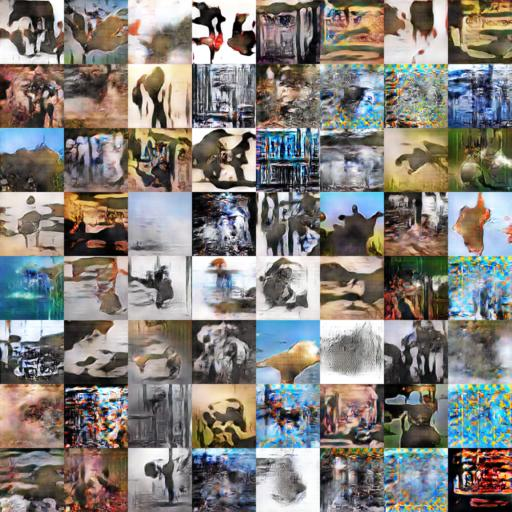

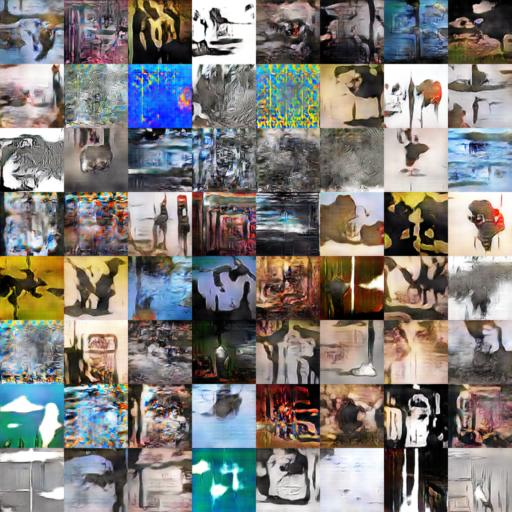

In [15]:
h = 512
w = 512

for i in range(10):
  img0 = load_image("samples/test_arange_" + str(i) + ".png",h, w)
  display_image(img0)
